# Estudo de correlação

Neste notebook estará presente a resposta em formato bruto da pergunta que rege todo esse projeto: qual a relação entre o número de feriados.

## Inicialização

puxando o banco de dados final e as bibliotecas.

In [8]:
import pandas as pd
import numpy as np

import seaborn as sns 
import matplotlib.pyplot as plt

df_final = pd.read_csv("./final.csv")

## Análise Exploratória de Dados

Aqui vamos ter um "gostinho"(preview) do que vamos encontrar no nosso dashboard no tópico 04 e no início da nossa página do projeto do Github:

In [9]:
df_final = df_final.dropna()

# visualizando o dataframe
df_final.head(10)

,País,Feriados total,Feriados folga,idh_rank,idh,expec_vida,Expected years of schooling,Mean years of schooling,GNI_percapita
0,afghanistan,22,17,180,0.478,62.0,10.264,2.985,1824.2
1,albania,39,21,67,0.796,76.5,14.448,11.286,14131.1
2,algeria,16,12,91,0.745,76.4,14.627,8.069,10800.2
3,andorra,29,14,40,0.858,80.4,13.300,10.555,51166.6
4,angola,18,14,148,0.586,61.6,12.172,5.417,5465.6
5,antigua-and-barbuda,18,13,71,0.788,78.5,14.185,9.294,16792.4
6,argentina,45,22,47,0.842,75.4,17.875,11.147,20925.3
7,armenia,44,12,85,0.759,72.0,13.117,11.330,13158.0
8,australia,120,43,5,0.951,84.5,21.055,12.727,49238.4
9,austria,38,19,25,0.916,81.6,16.008,12.257,53618.7


In [10]:
# estatísticas relacionadas ao nossos dados
round(df_final.describe(),1)

,Feriados total,Feriados folga,idh_rank,idh,expec_vida,Expected years of schooling,Mean years of schooling,GNI_percapita
count,163.0,163.0,163.0,163.0,163.0,163.0,163.0,163.0
mean,30.4,15.6,95.6,0.7,71.4,13.5,9.0,20384.6
std,17.0,6.6,55.9,0.2,7.7,3.0,3.2,22164.2
min,13.0,0.0,1.0,0.4,52.5,5.5,2.1,731.8
25%,21.0,12.0,46.5,0.6,65.8,11.6,6.3,4557.0
50%,26.0,15.0,95.0,0.7,71.7,13.4,9.3,12349.3
75%,34.0,17.5,141.5,0.8,77.0,15.6,11.4,30079.8
max,134.0,56.0,191.0,1.0,84.8,21.1,14.1,146829.7


Essas estatísticas nos ajudam a ver como se encontram a disposição dos dados, e podemos destacar as seguintes informações desse resumo de estatísticas:

- Não existem dados faltantes no nosso banco;
- Em média, existe aproximadamente metade de feriados que dão folga em relação a todos os feriados do ano de cada país;
- Dentre as estatísticas relacionadas à indices socioeconômicos, a que possui maior disperção é a de expectativa de vida (7.7 anos)
- A variação do número de feriados, tanto que folgam quanto no total é relativamente baixa.

Vamos visualizar a relação dessas relações por meio de um gráfico de pontos

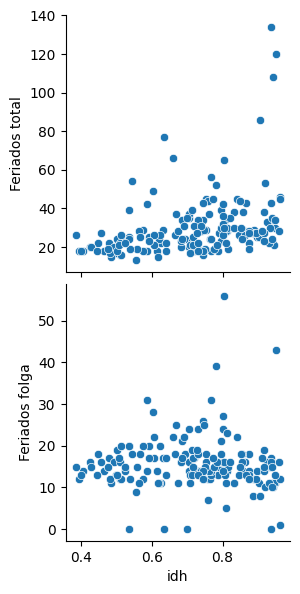

In [24]:
sns.pairplot(df_final,height=3,
            x_vars=["idh"],
            y_vars=["Feriados total", "Feriados folga"])

plt.show()

A princípio, podemos tirar uma conclusão precipitada ao visualizar o gráfico de pontos e observar, pela distribuição, que não existe relação direta (ou ela é baixa) entre o número de feriados (tanto total quanto de folga) e o IDH. Vamos reforçar essa ideia utilizando os demais índices socioeconômicos por meio de um cálculo de coeficiente de correlação de Pearson.

## Correlação

In [12]:
round(df_final.corr(), 1)

C:\Users\yurir\AppData\Local\Temp\ipykernel_8800\115267420.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  round(df_final.corr(), 1)


,Feriados total,Feriados folga,idh_rank,idh,expec_vida,Expected years of schooling,Mean years of schooling,GNI_percapita
Feriados total,1.0,0.2,-0.4,0.4,0.4,0.3,0.3,0.3
Feriados folga,0.2,1.0,0.0,-0.0,0.0,-0.0,-0.0,-0.1
idh_rank,-0.4,0.0,1.0,-1.0,-0.9,-0.9,-0.9,-0.8
idh,0.4,-0.0,-1.0,1.0,0.9,0.9,0.9,0.8
expec_vida,0.4,0.0,-0.9,0.9,1.0,0.8,0.7,0.7
Expected years of schooling,0.3,-0.0,-0.9,0.9,0.8,1.0,0.8,0.6
Mean years of schooling,0.3,-0.0,-0.9,0.9,0.7,0.8,1.0,0.6
GNI_percapita,0.3,-0.1,-0.8,0.8,0.7,0.6,0.6,1.0


DESCREVER VALORES E RELAÇÕES

C:\Users\yurir\AppData\Local\Temp\ipykernel_8800\305379618.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sns.heatmap(df_final.corr(),


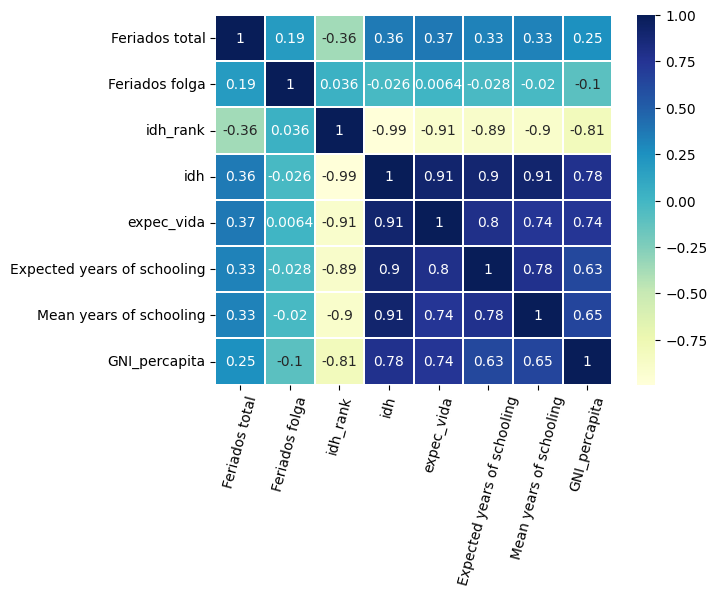

In [23]:
# heatmap para visualização da correlação em formato gráfico

# plotting correlation heatmap
dataplot = sns.heatmap(df_final.corr(), 
                       cmap="YlGnBu", 
                       annot=True,
                       linewidths=.2)


plt.xticks(rotation=75)
# displaying heatmap
plt.show()

focando nas duas primeiras linhas,onde se encontram os dados relacionados à feriados podemos perceber que não existe uma correlação considerável entre nenhum dos indices socioeconômicos coletados. 